# One hot encoding using different libraries in python

## Using Pandas

In [70]:
# Importing required libraries
import pandas as pd # For dataframe handling and operations.
import numpy as np # For numpy array operations.

from sklearn.model_selection import train_test_split # For Dataset split.
from sklearn.preprocessing import OneHotEncoder # Object for One-hot Encoding

In [71]:
# Load the dataset
def load_data():
    data = pd.read_csv("../../data/Titanic-Dataset.csv")
    return data

data = load_data() # Variable to store the Titanic dataset used throughout the examples.

# selecting attributes from the DataFrame
data = data[['sex', 'survived']]

 #sex is input feature while survived is the target
print(data.head())

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    data['sex'],
    data['survived'],
    test_size=0.3)

X_train.unique() # unique categories of sex feature

      sex  survived
0    male         0
1  female         1
2  female         1
3  female         1
4    male         0


array(['male', 'female'], dtype=object)

In [72]:
# One-hot encoding with pandas
# Use get_dummies function to generate one-hot encoded output

onehot1 = pd.get_dummies(X_train)
pd.concat([X_train, onehot1], axis=1).head()

,sex,female,male
99,male,False,True
84,female,True,False
471,male,False,True
504,female,True,False
5,male,False,True


In [73]:
# With attribute drop_first=True, k-1 dummy encoding

onehot2 = pd.get_dummies(X_train, drop_first=True)
pd.concat([X_train, onehot2], axis=1).head()

,sex,male
99,male,True
84,female,False
471,male,True
504,female,False
5,male,True


## Using Scikit-Learn

In [74]:
# One-hot encoding using Scikit-learn
onehot_encoder = OneHotEncoder(
    drop=None, # returns k dummy. for k-1 drop = first
  sparse_output=False) # returns numpy array

onehot_encoder.fit(np.array(X_train).reshape(-1,1)) #fit the training set

OneHotEncoder(sparse_output=False)

In [75]:
print('categories:', onehot_encoder.categories_)
print('Untransformed :')
print(X_test.head(6))
# Sklearn's one-hot encoder returns the numppy array or sparse matrix instead of dataframe.
print('Transformed:')
onehot_encoder.transform(np.array(X_test).reshape(-1,1))[:6]

categories: [array(['female', 'male'], dtype=object)]
Untransformed :
233    female
185      male
337    female
786    female
184    female
696      male
Name: sex, dtype: object
Transformed:


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

## Label encoding with pandas and scikit learn

In [76]:
data = pd.read_csv("../../data/Titanic-Dataset.csv")
data = data[['cabin', 'embarked', 'survived']]

data.head()

,cabin,embarked,survived
0,NaN,S,0
1,C85,C,1
2,NaN,S,1
3,C123,S,1
4,NaN,S,0


In [77]:
# taking the 1st letters from the cabin
data['cabin']=data['cabin'].str[0]
data.head()

,cabin,embarked,survived
0,NaN,S,0
1,C,C,1
2,NaN,S,1
3,C,S,1
4,NaN,S,0


In [78]:
print(data['cabin'].unique())
print(data['embarked'].unique())

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['S' 'C' 'Q' nan]


In [79]:
# taking rows that are not NaN from the dataset

for col in data.columns:
    data = data[data[col].notna()]

print(data['cabin'].unique())
print(data['embarked'].unique())

['C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['C' 'S' 'Q']


In [80]:
# splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin','embarked']],
    data['survived'],
    test_size=0.3,)

X_train.head()

,cabin,embarked
486,C,S
412,C,Q
572,E,S
394,G,S
230,C,S


In [81]:
label_mapping = {
    key: i for i, key in enumerate(X_train['cabin'].unique())
}
print(label_mapping)

{'C': 0, 'E': 1, 'G': 2, 'B': 3, 'D': 4, 'A': 5, 'F': 6, 'T': 7}


In [82]:
# function to compute label mapping

def compute_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].unique())}

#function to replace the variables with label encoding

def label_encoding(train, test, variable, label_mapping):

    X_train[variable] = X_train[variable].map(label_mapping)
    X_test[variable] = X_test[variable].map(label_mapping)

In [83]:
# Label encoding for all variables
for variable in ['cabin','embarked']:
    mapping = compute_category_mappings(X_train, variable)
    label_encoding(X_train, X_test, variable, mapping)

In [84]:
X_train.head()

,cabin,embarked
486,0,0
412,0,1
572,1,0
394,2,0
230,0,0


In [85]:
# using sklearn
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin','embarked']],
    data['survived'],
    test_size=0.3,)

# LabelEncoder only takes one feature at a time
label_encoder.fit_transform(X_train['cabin']) #label encoding of train set
label_encoder.transform(X_test['cabin']) #label encoding for test set

array([1, 3, 3, 4, 3, 2, 1, 1, 1, 4, 2, 3, 2, 2, 3, 0, 3, 1, 3, 2, 4, 0,
       0, 4, 2, 4, 4, 5, 3, 0, 3, 0, 2, 1, 0, 2, 3, 4, 2, 2, 2, 3, 1, 3,
       2, 0, 3, 5, 4, 4, 3, 2, 2, 6, 3, 1, 2, 1, 1, 1, 3])

In [86]:
from collections import defaultdict

X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin','embarked']],
    data['survived'],
    test_size=0.3,)
# creating a defaultdict object.
dic = defaultdict(LabelEncoder)

In [87]:
# Encoding the training set's variable
train_label_encoded = X_train.apply(lambda x: dic[x.name].fit_transform(x))

# Encoding the test set's variable
test_label_encoded = X_test.apply(lambda x: dic[x.name].transform(x))

In [88]:
#side by side comparision
print(X_train.head())
print(train_label_encoded.head())

    cabin embarked
504     B        S
345     F        S
765     D        S
515     D        S
496     D        C
     cabin  embarked
504      1         2
345      5         2
765      3         2
515      3         2
496      3         0


## Count/Frequency Encoding

In [89]:
#loading titanic dataset
data = load_data()[['cabin', 'embarked']]
data.head()

,cabin,embarked
0,NaN,S
1,C85,C
2,NaN,S
3,C123,S
4,NaN,S


In [90]:
# taking the 1st letters from the cabin
data['cabin']=data['cabin'].str[0]

# taking rows that are not NaN from the dataset
for col in data.columns:
    data = data[data[col].notna()]

data.head()

,cabin,embarked
1,C,C
3,C,S
6,E,S
10,G,S
11,C,S


In [91]:
print(data['cabin'].value_counts())
print(data['embarked'].value_counts())

cabin
C    59
B    45
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64
embarked
S    129
C     69
Q      4
Name: count, dtype: int64


In [92]:
# count mapping function
def count_mapping(df, variable):
    return df[variable].value_counts().to_dict()
# frequency mapping function
def frequency_mapping(df, variable):
    return (df[variable].value_counts()/len(df[variable])).to_dict()
# maps the dictionary values to the dataframes column
def encoding(df, variable, mapping):
    df[variable] = df[variable].map(mapping)

In [93]:
# Count mapping

data_temp = data
for cols in data_temp.columns:
    counts = count_mapping(data_temp, cols)
    encoding(data_temp, cols, counts)


data_temp.head(10)

,cabin,embarked
1,59,69
3,59,129
6,32,129
10,4,129
11,59,129
21,33,129
23,15,129
27,59,129
31,45,69
52,33,69


In [94]:
# frequency mapping

data_temp = data

for cols in data_temp.columns:
    frequency = frequency_mapping(data_temp, cols)
    encoding(data_temp, cols, frequency)

data_temp.head(10)

,cabin,embarked
1,0.292079,0.341584
3,0.292079,0.638614
6,0.158416,0.638614
10,0.019802,0.638614
11,0.292079,0.638614
21,0.163366,0.638614
23,0.074257,0.638614
27,0.292079,0.638614
31,0.222772,0.341584
52,0.163366,0.341584


## Mean/Target Encoding

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Mean-Encoding using feature engine package
from feature_engine.encoding import MeanEncoder

data = pd.read_csv("../../data/Titanic-Dataset.csv")

data = data[['sex', 'embarked', 'survived']]

data.head()

,sex,embarked,survived
0,male,S,0
1,female,C,1
2,female,S,1
3,female,S,1
4,male,S,0


In [96]:
# lets fill the na in embarked with "Missing"
data['embarked'].fillna('Missing', inplace=True)

# lets look at the no.of unique labels
for column in data.columns:
    no_of_labels = len(data[column].unique())
    print(f"{column} : {no_of_labels} labels")

sex : 2 labels
embarked : 4 labels
survived : 2 labels


C:\Users\Dell\AppData\Local\Temp\ipykernel_12924\2929870672.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embarked'].fillna('Missing', inplace=True)


In [97]:
# splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data[['sex', 'embarked', 'survived']], #keeping the target in input set
    data['survived'],
    test_size = 0.3,
    random_state = 42)

X_train.head()

,sex,embarked,survived
445,male,S,1
650,male,S,0
172,female,S,1
450,male,S,0
314,male,S,0


In [98]:
def relationship_plot(variables):
    for var in variables:
        plt.figure()
        plt.plot(X_train.groupby([var])['survived'].mean())#calculates mean of target value per variable
        plt.title(f'Relationship between {var} and Survival')
        plt.ylabel('Mean value Survival')
        plt.show()

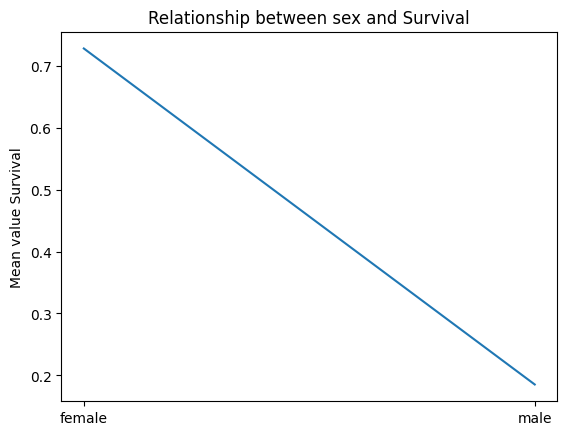

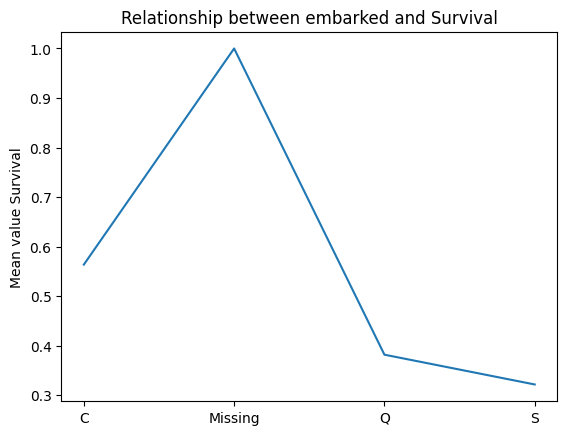

In [99]:
relationship_plot(['sex', 'embarked'])

- The relationship is montonic between sex and survival.

In [100]:
# function to compute dictionary with mean mapping
def mean_mapping(df, variable, target):
    tempdf = df.groupby([variable])[target]
    return tempdf.mean().to_dict()

def encoding(df, variable, mapping):
    df[variable] = df[variable].map(mapping)

In [101]:
# replacing labels with mean_target value per observation.

for variable in ['sex','embarked']:
    means = mean_mapping(X_train, variable, 'survived')
    encoding(X_train, variable, means)

X_train.head()

,sex,embarked,survived
445,0.185366,0.321663,1
650,0.185366,0.321663,0
172,0.727700,0.321663,1
450,0.185366,0.321663,0
314,0.185366,0.321663,0


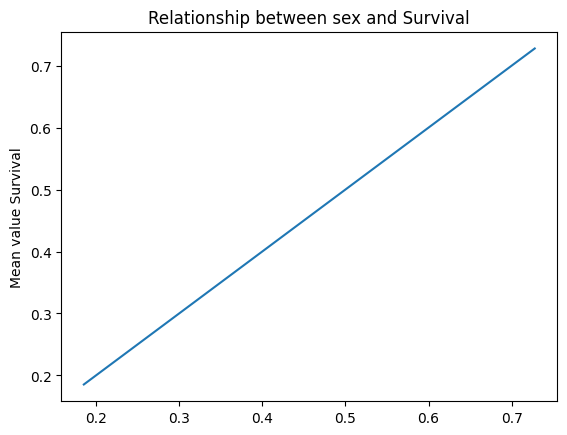

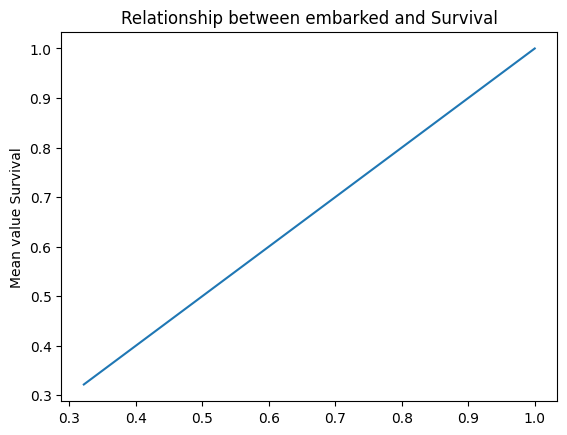

In [ ]:
# lets see the relationship again, it must be converted to monotonic ones.
relationship_plot(['sex', 'embarked'])

In [102]:
# mean encoder using feature-engine
# variables attribute are the variables that need to be encoded.
mean_encoder = MeanEncoder(variables=['sex','embarked'])

# splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(
    data[['sex', 'embarked']], #variables
    data['survived'], #target
    test_size = 0.3,
    random_state = 42)

mean_encoder.fit(X_train, y_train)

MeanEncoder(variables=['sex', 'embarked'])

In [103]:
X_train = mean_encoder.transform(X_train)
X_test = mean_encoder.transform(X_test)

X_train.head()

,sex,embarked
445,0.185366,0.321663
650,0.185366,0.321663
172,0.727700,0.321663
450,0.185366,0.321663
314,0.185366,0.321663


## Weight of Evidence

In [104]:
#loading the titanic dataset
data = load_data()

data = data[['cabin','embarked','survived']]

#Taking the 1st strings from cabin features
data['cabin'] = data['cabin'].astype('str').str[0] #requires type as string

#removing the na values
data = data[data['embarked'].notna()]
data.head()

,cabin,embarked,survived
0,n,S,0
1,C,C,1
2,n,S,1
3,C,S,1
4,n,S,0


In [105]:
# lets look at the count of categories of cabin features

print(data['cabin'].value_counts())

#Since, the count of 'T' category is so low, it can throw error when computing the log.
# removing the 'T' category

data = data[data['cabin'] != 'T']

print(data['cabin'].value_counts())

cabin
n    687
C     59
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64
cabin
n    687
C     59
B     45
D     33
E     32
A     15
F     13
G      4
Name: count, dtype: int64


In [106]:
# Dividing the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin','embarked','survived']], #keep the target
    data['survived'],
    test_size=0.3,
    random_state=42)

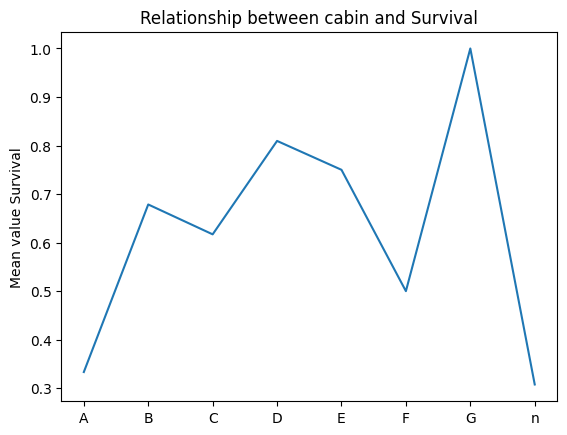

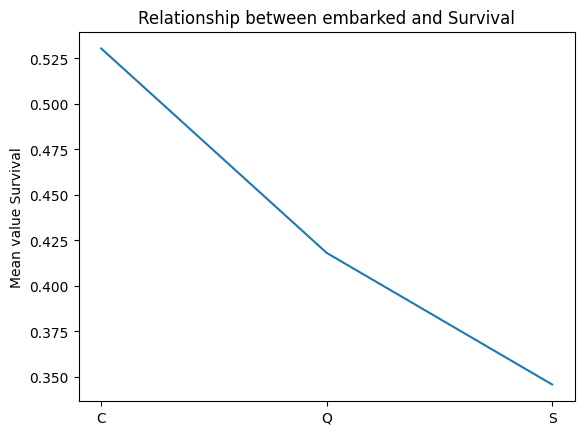

In [107]:
# Visualize the relationship
relationship_plot(['cabin','embarked'])

In [108]:
# Calculate probability of survived
# group by cabin, then calculate the target value's mean.
probability_df = X_train.groupby(['cabin'])['survived'].mean()
probability_df = pd.DataFrame(probability_df)

# calculate the probabilty of dead
probability_df['dead'] = 1-probability_df['survived']

# calculate the weight of evidence ratio

probability_df['WOE'] = np.log(probability_df['survived']/probability_df['dead'])

probability_df

,survived,dead,WOE
cabin,,,
A,0.333333,0.666667,-0.693147
B,0.678571,0.321429,0.747214
C,0.617021,0.382979,0.476924
D,0.809524,0.190476,1.446919
E,0.750000,0.250000,1.098612
F,0.500000,0.500000,0.000000
G,1.000000,0.000000,inf
n,0.307692,0.692308,-0.810930


In [109]:
# now, we need to replace the WOE value to the specific category.

# create a dictionary then map the values as usual
WOE_mapping = probability_df['WOE'].to_dict()
WOE_mapping

X_train['cabin'] = X_train['cabin'].map(WOE_mapping)
X_test['cabin'] = X_test['cabin'].map(WOE_mapping)

X_test.head(10)

,cabin,embarked,survived
281,-0.81093,S,0
436,-0.81093,S,0
39,-0.81093,C,1
419,-0.81093,S,0
586,-0.81093,S,0
805,-0.81093,S,0
344,-0.81093,S,0
837,-0.81093,S,0
582,-0.81093,S,0
538,-0.81093,S,0


In [110]:
# convert all these steps into function as before
# Dividing the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin','embarked','survived']], #keep the target
    data['survived'],
    test_size=0.3,
    random_state=42)

In [111]:
def WOE_mapping(df, variable, target):

    prob = pd.DataFrame(df.groupby([variable])[target].mean())
    prob['Not_target'] = 1 - prob[target]
    prob['ratio'] = np.log( prob[target] / prob['Not_target'])
    return prob['ratio'].to_dict()

for variable in ['cabin','embarked']:
    WOE = WOE_mapping(X_train, variable, 'survived')
    encoding(X_train, variable, WOE)
    encoding(X_test, variable, WOE)

X_train.head()

,cabin,embarked,survived
487,0.747214,0.121890,0
293,-0.810930,-0.637119,0
173,-0.810930,-0.637119,0
451,-0.810930,-0.637119,0
362,-0.810930,0.121890,0


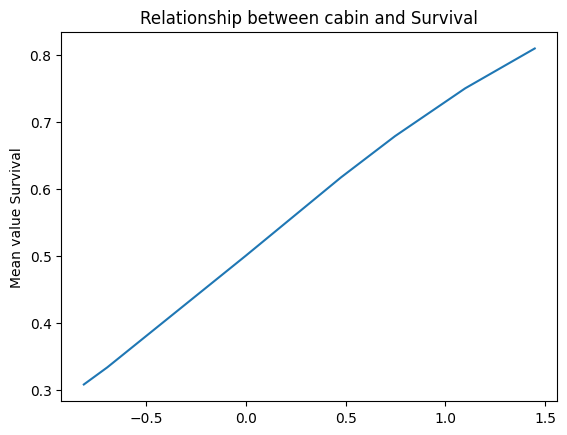

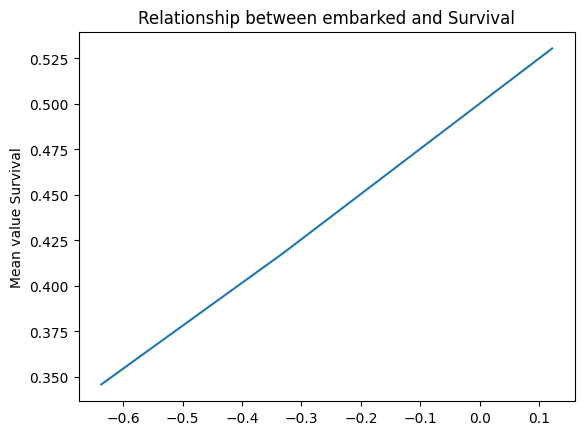

In [112]:
#ploting relationship
relationship_plot(['cabin','embarked'])

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from feature_engine.encoding import WoEEncoder

# --- Step 1: Load your data ---
# For demo: use Titanic or your custom dataframe
# data = pd.read_csv('titanic.csv')  # ensure 'cabin', 'embarked', 'survived' are present

# --- Step 2: Fill missing values ---
data['cabin'] = data['cabin'].fillna('Missing')
data['embarked'] = data['embarked'].fillna('Missing')

# --- Step 3: Split into X and y ---
X = data[['cabin', 'embarked']]
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- Step 4: Remove cabin categories that appear only in one class ---
# Merge to find cabin vs target distribution
train_temp = X_train.copy()
train_temp['target'] = y_train

# Count positive and negative survival for each cabin
cabin_dist = train_temp.groupby('cabin')['target'].agg(['sum', 'count'])
cabin_dist['zeros'] = cabin_dist['count'] - cabin_dist['sum']

# Keep only those with at least one 0 and one 1
valid_cabins = cabin_dist[
    (cabin_dist['sum'] > 0) & (cabin_dist['zeros'] > 0)
].index

# Filter X_train and y_train accordingly
X_train = X_train[X_train['cabin'].isin(valid_cabins)]
y_train = y_train.loc[X_train.index]

# Also filter X_test to keep only known cabins (optional)
X_test = X_test[X_test['cabin'].isin(valid_cabins)]

# --- Step 5: Apply WoEEncoder ---
woe_encoder = WoEEncoder(variables=['cabin', 'embarked'])

woe_encoder.fit(X_train, y_train)
X_test_woe = woe_encoder.transform(X_test)

# --- Step 6: Display ---
print(X_test_woe.head())

        cabin  embarked
281 -0.344594 -0.177214
436 -0.344594 -0.177214
39  -0.344594  0.588226
419 -0.344594 -0.177214
586 -0.344594 -0.177214


## Rare label encoding

In [120]:
data = load_data()

variable = 'cabin'
# large cardinality often results in rare labels
data[variable] = data[variable].astype('str').str[0]
data = data[data[variable].notna()]

print(data.groupby(variable)[variable].count()/len(data)) #percentage of occurance

cabin
A    0.016835
B    0.052750
C    0.066218
D    0.037037
E    0.035915
F    0.014590
G    0.004489
T    0.001122
n    0.771044
Name: cabin, dtype: float64


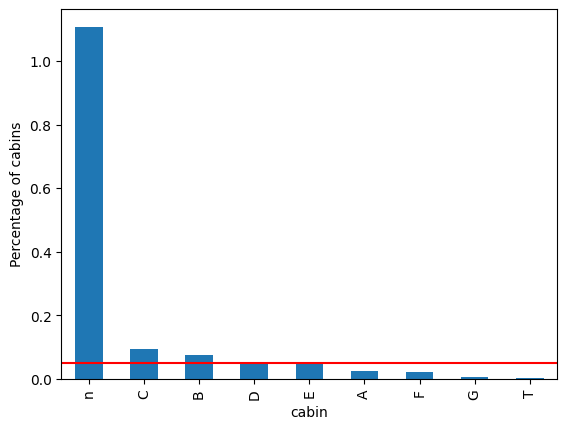

In [121]:
def display_rare(df, variable):

    value_df = pd.Series(df[variable].value_counts() / len(X_train) )

    # make plot with the above percentages
    fig = value_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(variable)
    fig.set_ylabel('Percentage of cabins')
    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    plt.show()

display_rare(data, 'cabin')

In [122]:
# Function used to find rare labels
def find_rare_labels(df, variables, tolerance):
    temp_df = df.groupby([variables])[variables].count()/len(df)
    rare = [x for x in temp_df.loc[temp_df<tolerance].index.values]
    return rare

find_rare_labels(data, 'cabin', 0.05)

['A', 'D', 'E', 'F', 'G', 'T']

In [123]:
def rare_label_encoding(df, variables, tolerance):
    rare_cat = find_rare_labels(df, variables, tolerance)

    # re-group rare labels
    df[variables] = np.where(df[variables].isin(
        rare_cat), 'Rare', df[variables])

    return df

rare1 = rare_label_encoding(data, 'cabin', 0.05)

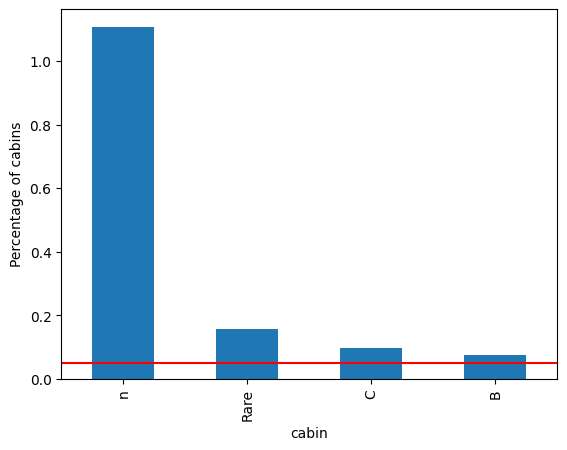

In [124]:
display_rare(rare1, 'cabin')